In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()



In [2]:
df = pd.read_pickle('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/bom_df_for_model.pkl')

In [3]:
final_cols = ['movie_name_bom', 'movie_name_tn', 'alt', 'genre', 'dom_tot_gross', 'newcol', 'rating','is_holiday', 'runtime_3']
# final_cols = [ 'dom_tot_gross', 'newcol', 'is_holiday', 'runtime_3', 'genre', 'rating']

df_final = df[final_cols]


In [4]:
# Drop outliers
# df_final['dom_tot_gross'].describe()

# df_final = df_final[df_final['dom_tot_gross'] > 1.365193e+07]
# df_final = df_final[df_final['dom_tot_gross'] < 9.354447e+07]


In [5]:
df_final['dom_tot_gross'] = df_final['dom_tot_gross'].dropna()

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_final.count()

movie_name_bom    923
movie_name_tn     864
alt               923
genre             923
dom_tot_gross     922
newcol            923
rating            923
is_holiday        923
runtime_3         923
dtype: int64

In [7]:
df_final['dom_tot_gross'] = pd.to_numeric(df_final['dom_tot_gross'])
df_final['newcol'] = pd.to_numeric(df_final['newcol'])
df_final['is_holiday'] = pd.to_numeric(df_final['is_holiday'])
df_final['runtime_3'] = pd.to_numeric(df_final['runtime_3'])


/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [8]:
df_final = pd.concat([df_final, pd.get_dummies(df_final['genre'])], axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['rating'])], axis=1)

In [9]:
df_final.head()

,movie_name_bom,movie_name_tn,alt,genre,dom_tot_gross,newcol,rating,is_holiday,runtime_3,1 hrs. 47 min.,...,Sports Comedy,Thriller,Unknown,War,G,N/A,PG,PG-13,R,Unrated
0,slither,slither,slither,Sci-Fi Horror,7802450.0,15000000.0,R,False,96,0,...,0,0,0,0,0,0,0,0,1,0
1,the relic,the relic,the relic,Horror,33956608.0,60000000.0,R,False,109,0,...,0,0,0,0,0,0,0,0,1,0
3,the hobbit:the battle of the five armies,the hobbit: the battle of the five armies,the hobbit: the battle of the five armies,Fantasy,255119788.0,250000000.0,PG-13,False,144,0,...,0,0,0,0,0,0,0,1,0,0
4,how he fell in love,how to fall in love,how to fall in love,Romance,17575.0,4000000.0,Unrated,False,107,0,...,0,0,0,0,0,0,0,0,0,1
5,jackass 3-d,jackass 3d,jackass 3d,Comedy,117229692.0,20000000.0,R,False,94,0,...,0,0,0,0,0,0,0,0,1,0


/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

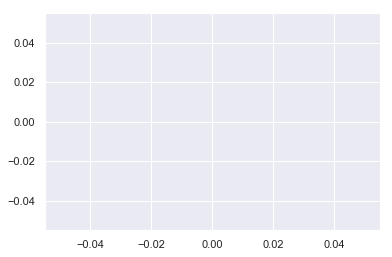

In [10]:
sns.distplot(df_final['dom_tot_gross'])

In [ ]:
df_final.head()

In [ ]:
df_final = df_final.reset_index()
df_final = df_final.drop(['index'], axis=1)


In [11]:
df_final = df_final.drop(['1 hrs. 47 min.'], axis=1)

In [1]:
# df_final = df_final.drop(['genre'], axis=1)
# df_final = df_final.drop(['rating'], axis=1)
# df_final = df_final.drop(['movie_name_bom', 'movie_name_tn', 'alt'], axis=1)
# df_final = df_final.drop(['res', 'abs_res'], axis=1)
# df_final['Romantic Comedy'].value_counts()


In [25]:
df_final['is_holiday'] = df_final['is_holiday'].astype('int')
df_final.head()

,movie_name_bom,movie_name_tn,alt,genre,dom_tot_gross,newcol,rating,is_holiday,runtime_3,Action,...,Sports Comedy,Thriller,Unknown,War,G,N/A,PG,PG-13,R,Unrated
0,slither,slither,slither,Sci-Fi Horror,7802450.0,15000000.0,R,0,96,0,...,0,0,0,0,0,0,0,0,1,0
1,the relic,the relic,the relic,Horror,33956608.0,60000000.0,R,0,109,0,...,0,0,0,0,0,0,0,0,1,0
3,the hobbit:the battle of the five armies,the hobbit: the battle of the five armies,the hobbit: the battle of the five armies,Fantasy,255119788.0,250000000.0,PG-13,0,144,0,...,0,0,0,0,0,0,0,1,0,0
4,how he fell in love,how to fall in love,how to fall in love,Romance,17575.0,4000000.0,Unrated,0,107,0,...,0,0,0,0,0,0,0,0,0,1
5,jackass 3-d,jackass 3d,jackass 3d,Comedy,117229692.0,20000000.0,R,0,94,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# df_final.iloc[66]
df_final[df_final.isnan()]

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [15]:
sns.pairplot(df_final[df_final.iloc[df_final, 0:3]])

TypeError: '>=' not supported between instances of 'str' and 'int'

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation

features = df_final.drop(['dom_tot_gross'],axis=1)
target = df_final['dom_tot_gross']

df_final = df_final.dropna(subset = ['dom_tot_gross'])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, target, test_size=0.33, random_state=42)

In [17]:
features.isna().sum()

movie_name_bom         0
movie_name_tn         59
alt                    0
genre                  0
newcol                 0
rating                 0
is_holiday             0
runtime_3              0
Action                 0
Action / Adventure     0
Action Comedy          0
Action Drama           0
Action Fantasy         0
Action Horror          0
Action Thriller        0
Adventure              0
Adventure Comedy       0
Animation              0
Comedy                 0
Comedy / Drama         0
Concert                0
Documentary            0
Drama                  0
Family                 0
Family Adventure       0
Family Comedy          0
Fantasy                0
Fantasy Comedy         0
Fantasy Drama          0
Foreign                0
Horror                 0
Horror Comedy          0
Horror Thriller        0
IMAX                   0
Music Drama            0
Period Action          0
Period Adventure       0
Period Comedy          0
Period Horror          0
Romance                0


In [18]:
# df_dropped_0_coef = df_final.drop(cols_to_drop, axis=1).drop(['res', 'abs_res'], axis=1)


In [19]:
# Adding polynomial features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# poly = PolynomialFeatures(2, interaction_only=True)
# features = poly.fit_transform(features)

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [21]:
# Scaling happens here

std = StandardScaler()

std.fit(X_train_1)

X_tr = std.transform(X_train_1)
X_te = std.transform(X_test_1)

ValueError: could not convert string to float: 'R'

In [ ]:
m = LinearRegression()

m.fit(X_tr, y_train_1)
m.score(X_tr, y_train_1)

In [22]:
m.score(X_te, y_test_1)

NameError: name 'm' is not defined

In [23]:
X_tr.shape

NameError: name 'X_tr' is not defined

In [24]:
m = LassoCV()

m.fit(X_tr, y_train_1)
m.coef_
m.score(X_tr, y_train_1)

NameError: name 'X_tr' is not defined

In [168]:
m.score(X_te, y_test_1)
# y_test_1 = y_test_1[y_test_1.isna()]

0.2921448511406489

array([3.74866999e+05, 1.92214785e+06, 4.17083916e+07, 2.43134516e+05,
       2.65393868e+07, 1.61841485e+06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.04866782e+07, 2.78103770e+05, 0.00000000e+00, 2.19613524e+05,
       1.13009767e+06, 4.89483783e+06, 0.00000000e+00, 2.95589374e+06,
       1.41525910e+06, 1.21718453e+07, 0.00000000e+00, 5.07500658e+05,
       0.00000000e+00, 5.41340317e+05, 1.08887492e+04, 4.85425508e+06,
       4.24966498e+06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.35007407e+06, 2.07332060e+06, 2.49593047e+06, 0.00000000e+00,
       7.97583657e+06, 3.65116220e+06, 0.00000000e+00, 1.57875259e+07,
       0.00000000e+00, 3.37759740e+07, 1.70084809e+06, 1.44872564e+06,
       2.74779840e+06, 1.82087034e+06, 3.67863260e+06, 1.24715166e+06,
       7.10547951e+06, 0.00000000e+00, 1.35648745e+07, 0.00000000e+00,
       8.83238671e+06, 2.42766362e+06])

In [172]:
df_coef = pd.DataFrame([df_final.columns, m.coef_]).T

In [201]:
df_coef = df_coef.dropna()

In [204]:
df_coef['abs_c'] = abs(pd.Series(df_coef[1]))


/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
df_coef.sort_values(['abc_c'], ascending=False)

KeyError: 'abc_c'

In [142]:
cols_to_drop = df_coef[df_coef[1] == 0][0]

In [143]:
cols_to_drop

6        Action Comedy
7         Action Drama
8       Action Fantasy
9        Action Horror
10     Action Thriller
11           Adventure
14              Comedy
18               Drama
22             Fantasy
24       Fantasy Drama
29                IMAX
30         Music Drama
31       Period Action
35             Romance
38              Sci-Fi
40    Sci-Fi Adventure
49                   G
51                  PG
Name: 0, dtype: object

In [144]:
result = m.predict(std.transform(features))

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [145]:
df_final['res'] = result - df_final['dom_tot_gross']
df_final['abs_res'] = abs(df_final['res'])


In [148]:
df_final.head()
# df_final.reset_index()
# df_final.drop(['index'], axis=1)

,dom_tot_gross,newcol,is_holiday,runtime_3,Action,Action / Adventure,Action Comedy,Action Drama,Action Fantasy,Action Horror,...,Unknown,War,G,N/A,PG,PG-13,R,Unrated,res,abs_res
0,7802450.0,15000000.0,0,96,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.924325e+06,9.924325e+06
1,33956608.0,60000000.0,0,109,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2.946080e+07,2.946080e+07
2,255119788.0,250000000.0,0,144,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.686712e+06,1.686712e+06
3,17575.0,4000000.0,0,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.839525e+07,1.839525e+07
4,117229692.0,20000000.0,0,94,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-9.631969e+07,9.631969e+07


In [404]:
df_mov_names = df_final.merge(df, how='left', left_on = 'dom_tot_gross', right_on='dom_tot_gross')

In [405]:
df_mov_names = df_mov_names[['movie_name_bom', 'dom_tot_gross', 'res', 'abs_res']]


KeyError: "['res' 'abs_res'] not in index"

In [406]:
df_mov_names.sort_values(['abs_res'], ascending=False).head()

KeyError: 'abs_res'

In [326]:
# df_mov_names['res_abs_pct'] = df_mov_names['abs_res'] / df_mov_names['dom_tot_gross']
# df_mov_names.drop(['res_abs_pct'], axis=1)

KeyError: "['res_abs_pct'] not found in axis"

In [328]:
df_mov_names.sort_values(['abs_res'], ascending=False).head()

,movie_name_bom,dom_tot_gross,res,abs_res
79,grindhouse,25037897.0,3.661279e+08,3.661279e+08
442,mortal engines,15951040.0,3.517887e+08,3.517887e+08
201,avatar,749766139.0,-2.737160e+08,2.737160e+08
841,cats don't dance,3566637.0,2.624423e+08,2.624423e+08
563,the nutcracker in 3d,195459.0,2.586744e+08,2.586744e+08


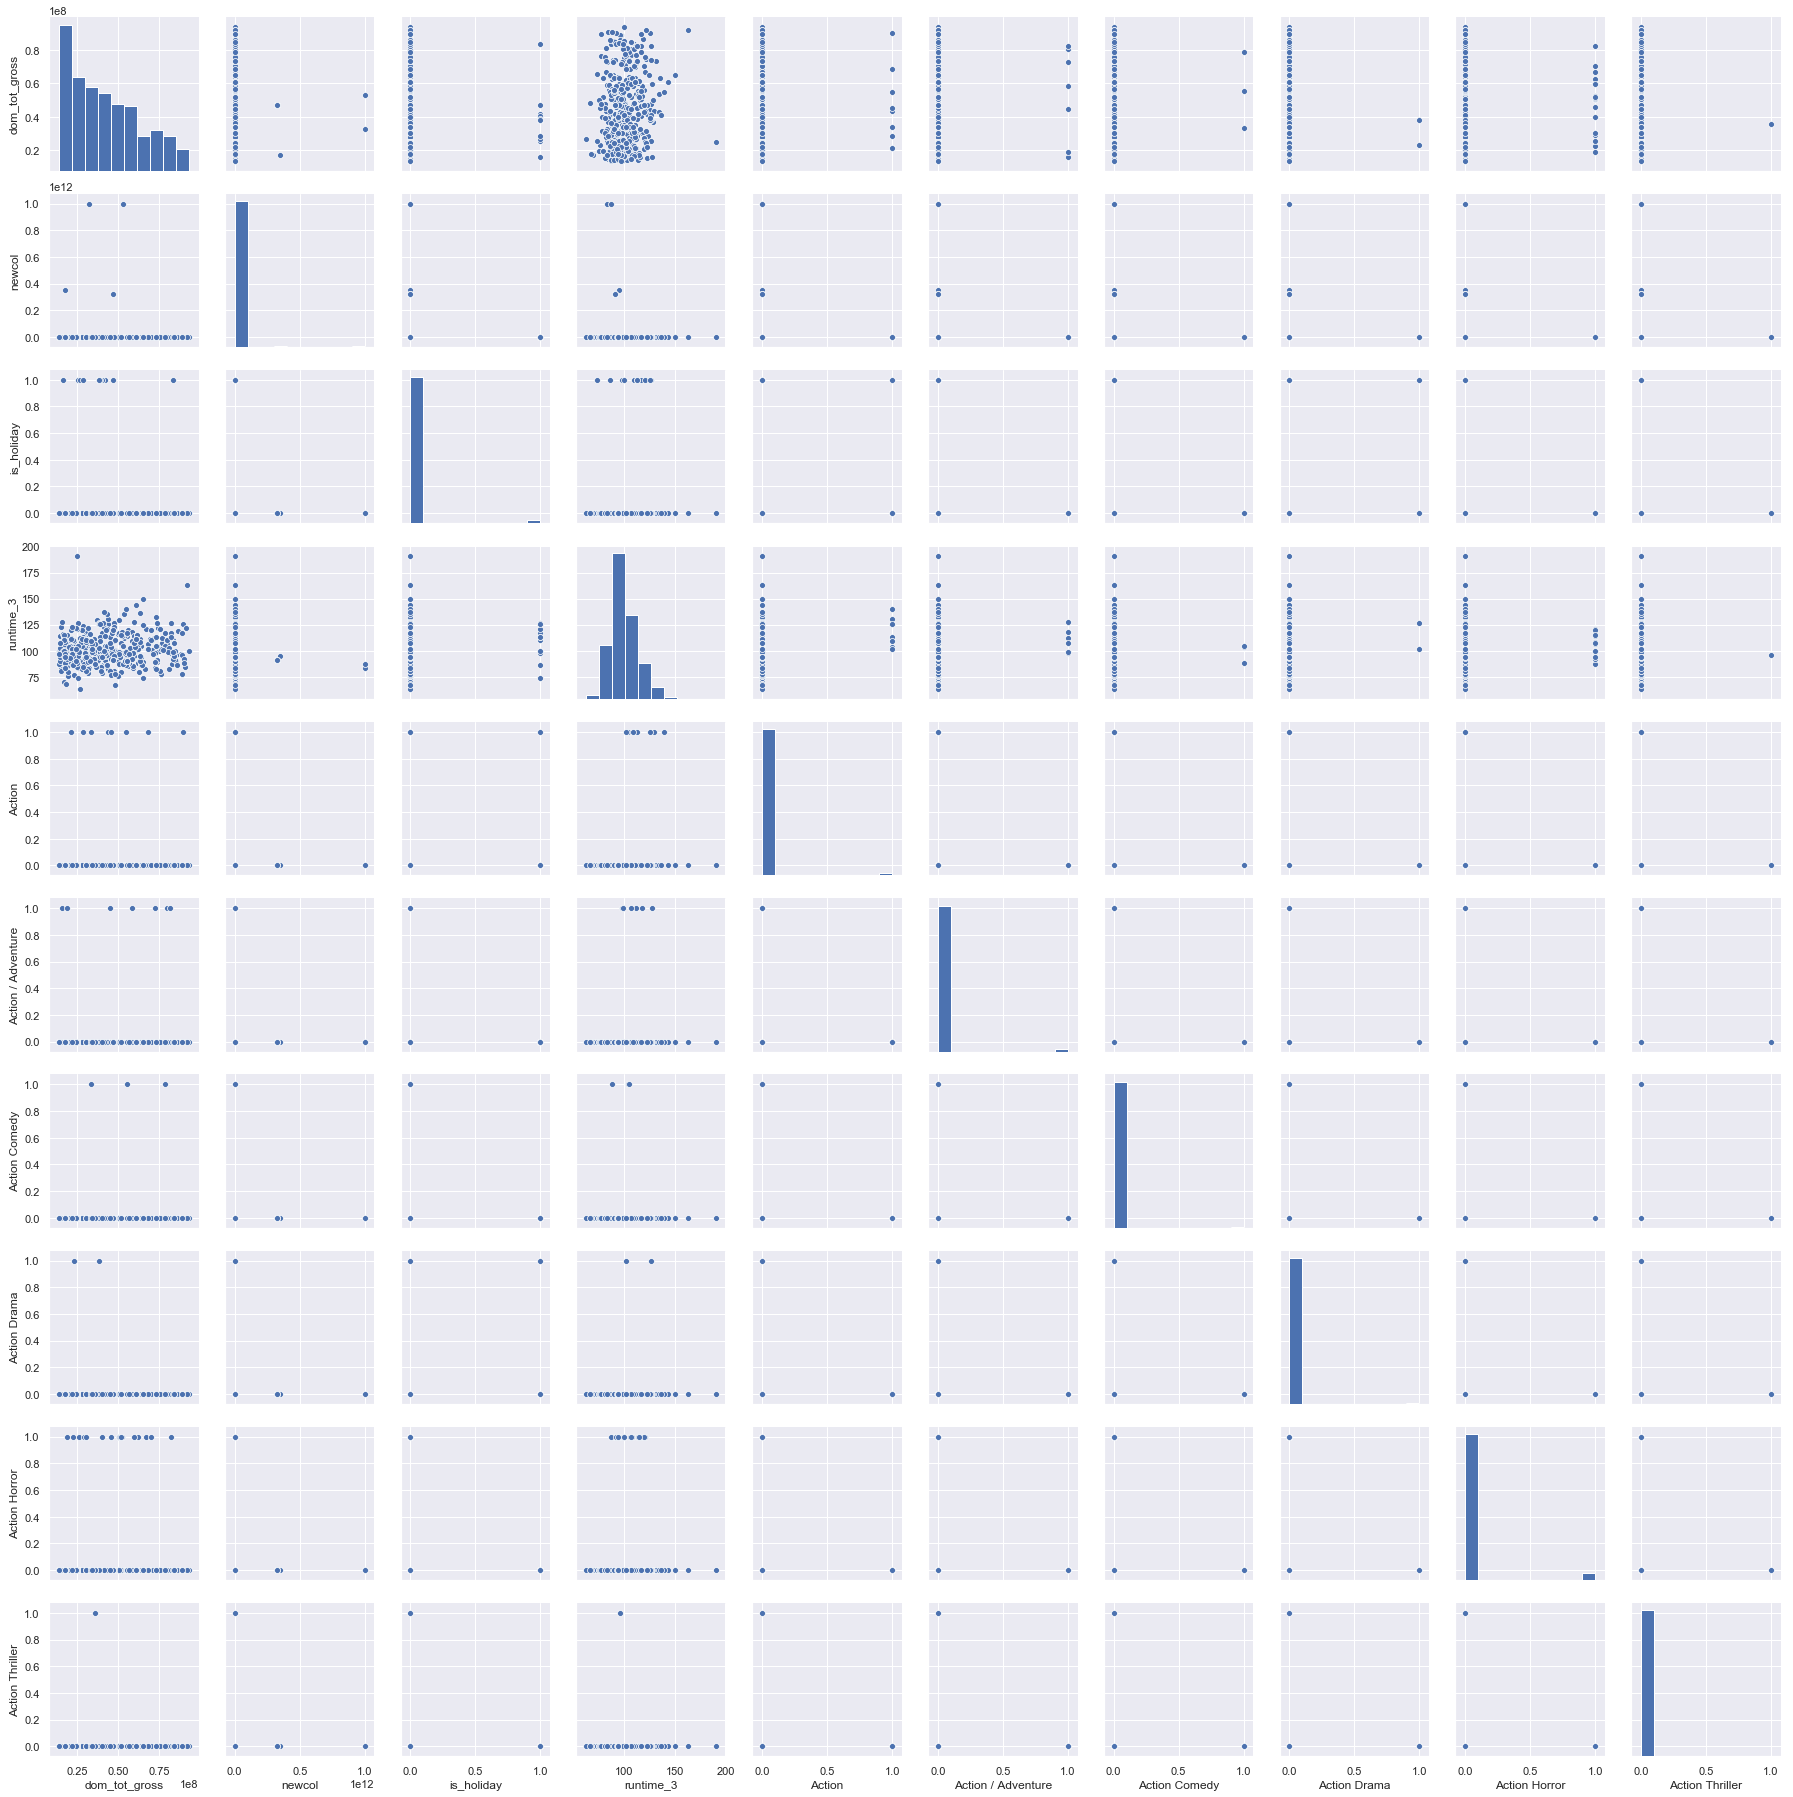

In [38]:
# print(m.predict(X_te) - y_test_1)

# df_final['dom_tot_gross'].isna().value_counts()
# df_final = df_final.dropna(subset = ['dom_tot_gross'])
sns.pairplot(df_final.iloc[: , 0:10]) 


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

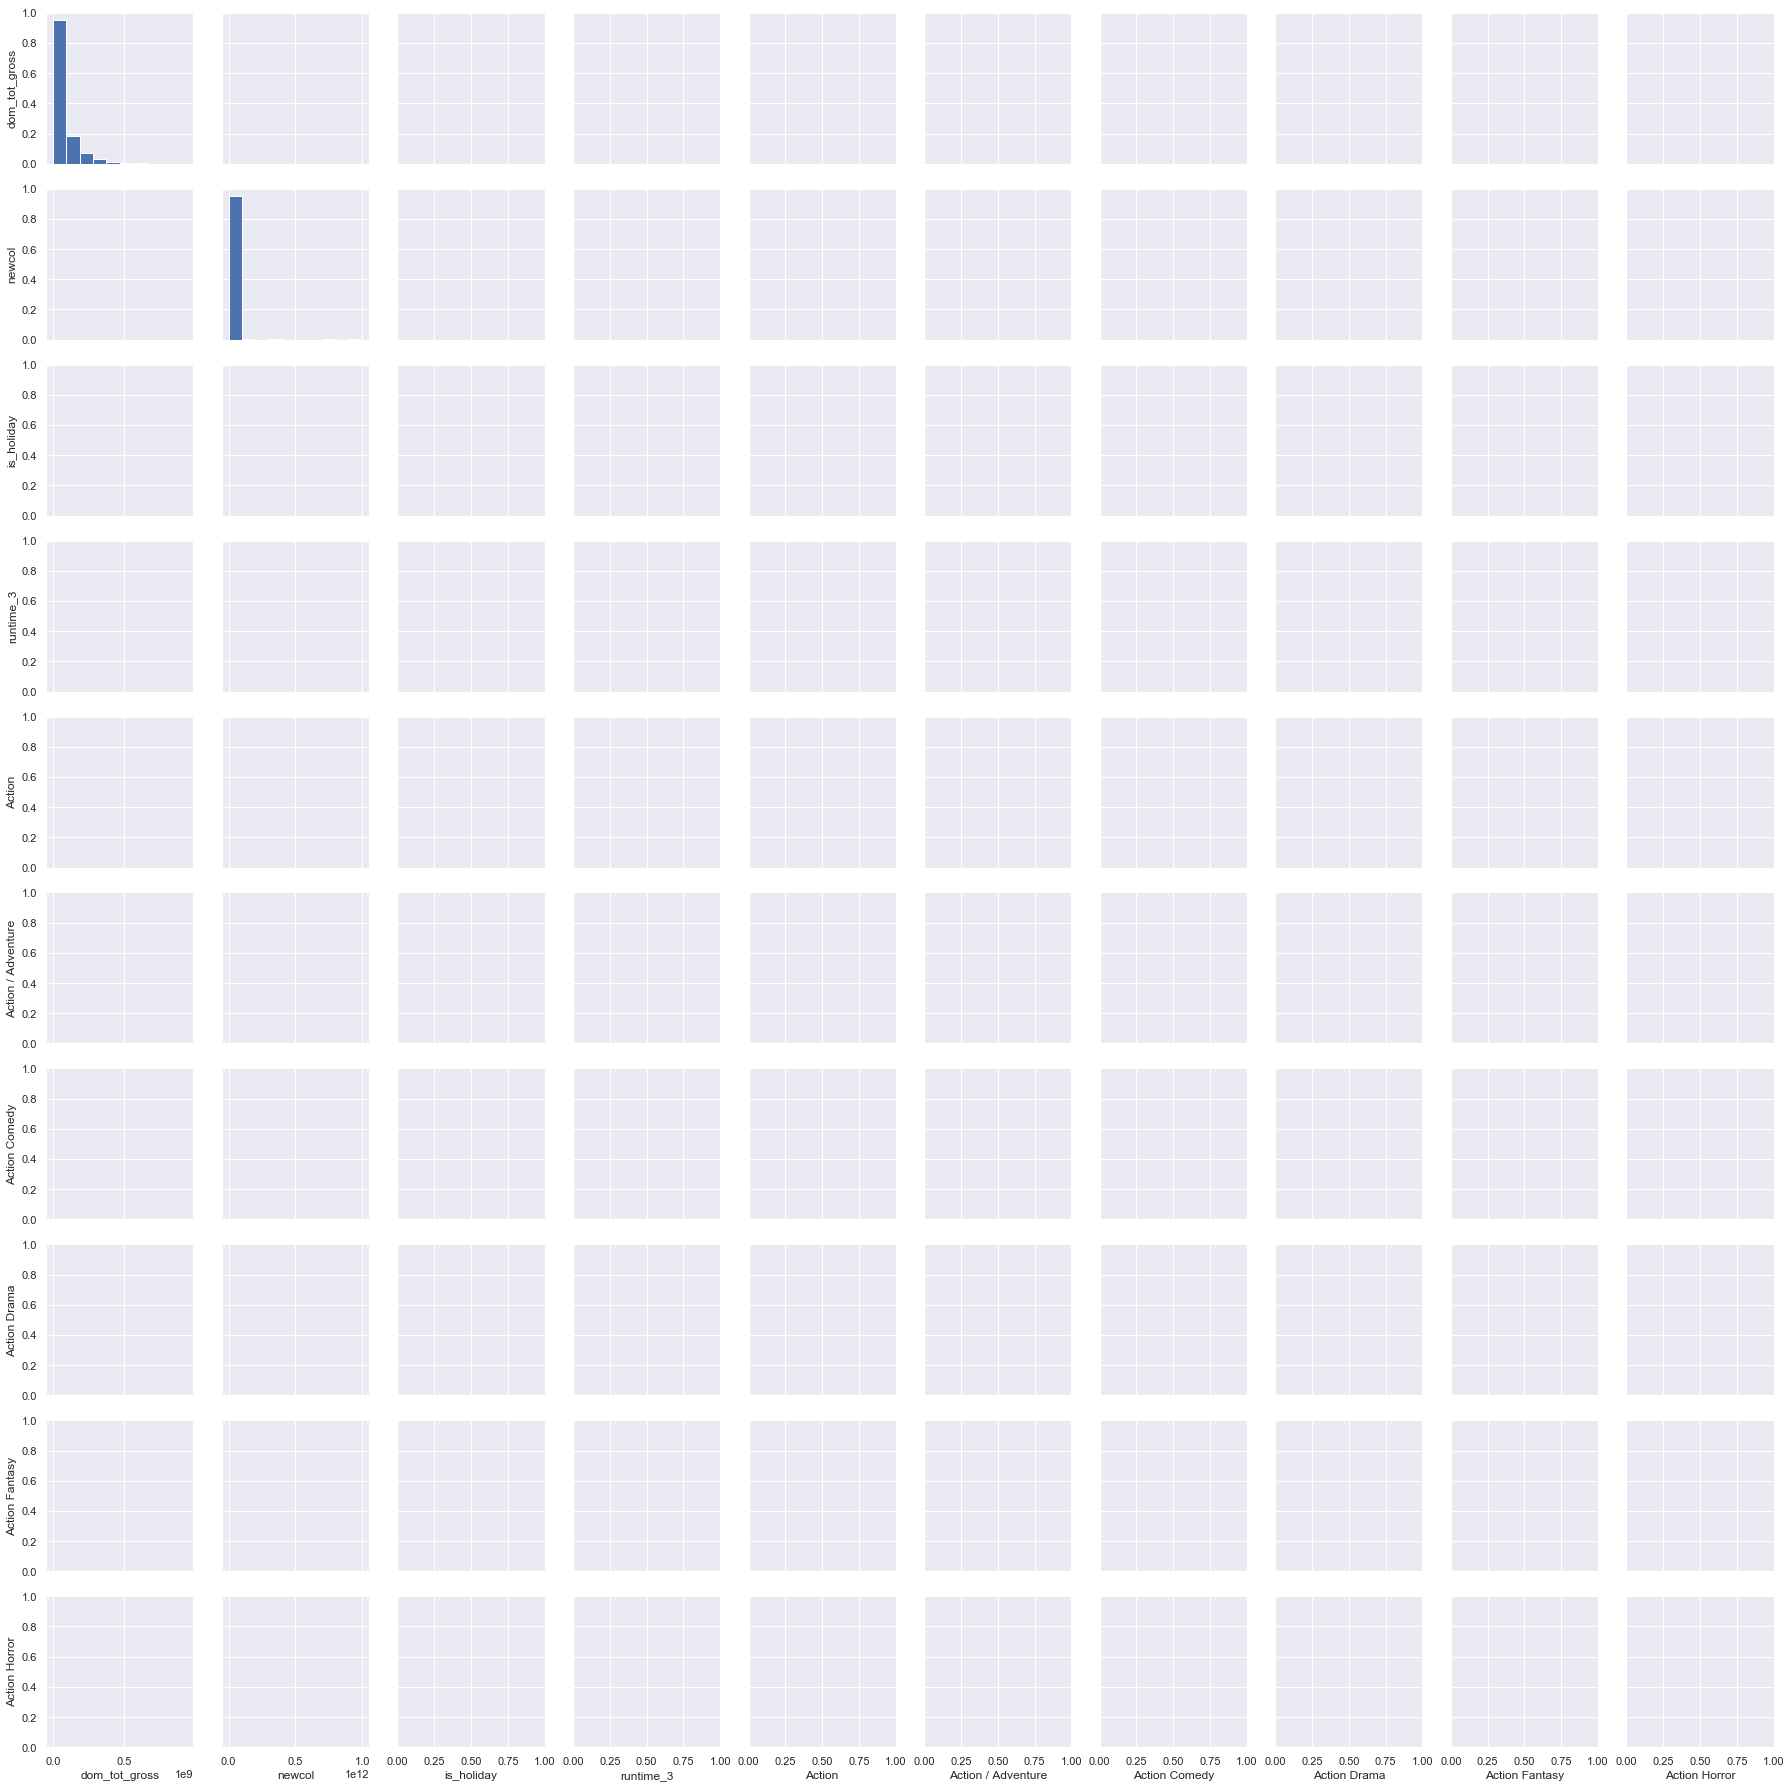

In [403]:
sns.pairplot(df_final.iloc[: , 0:10]) 


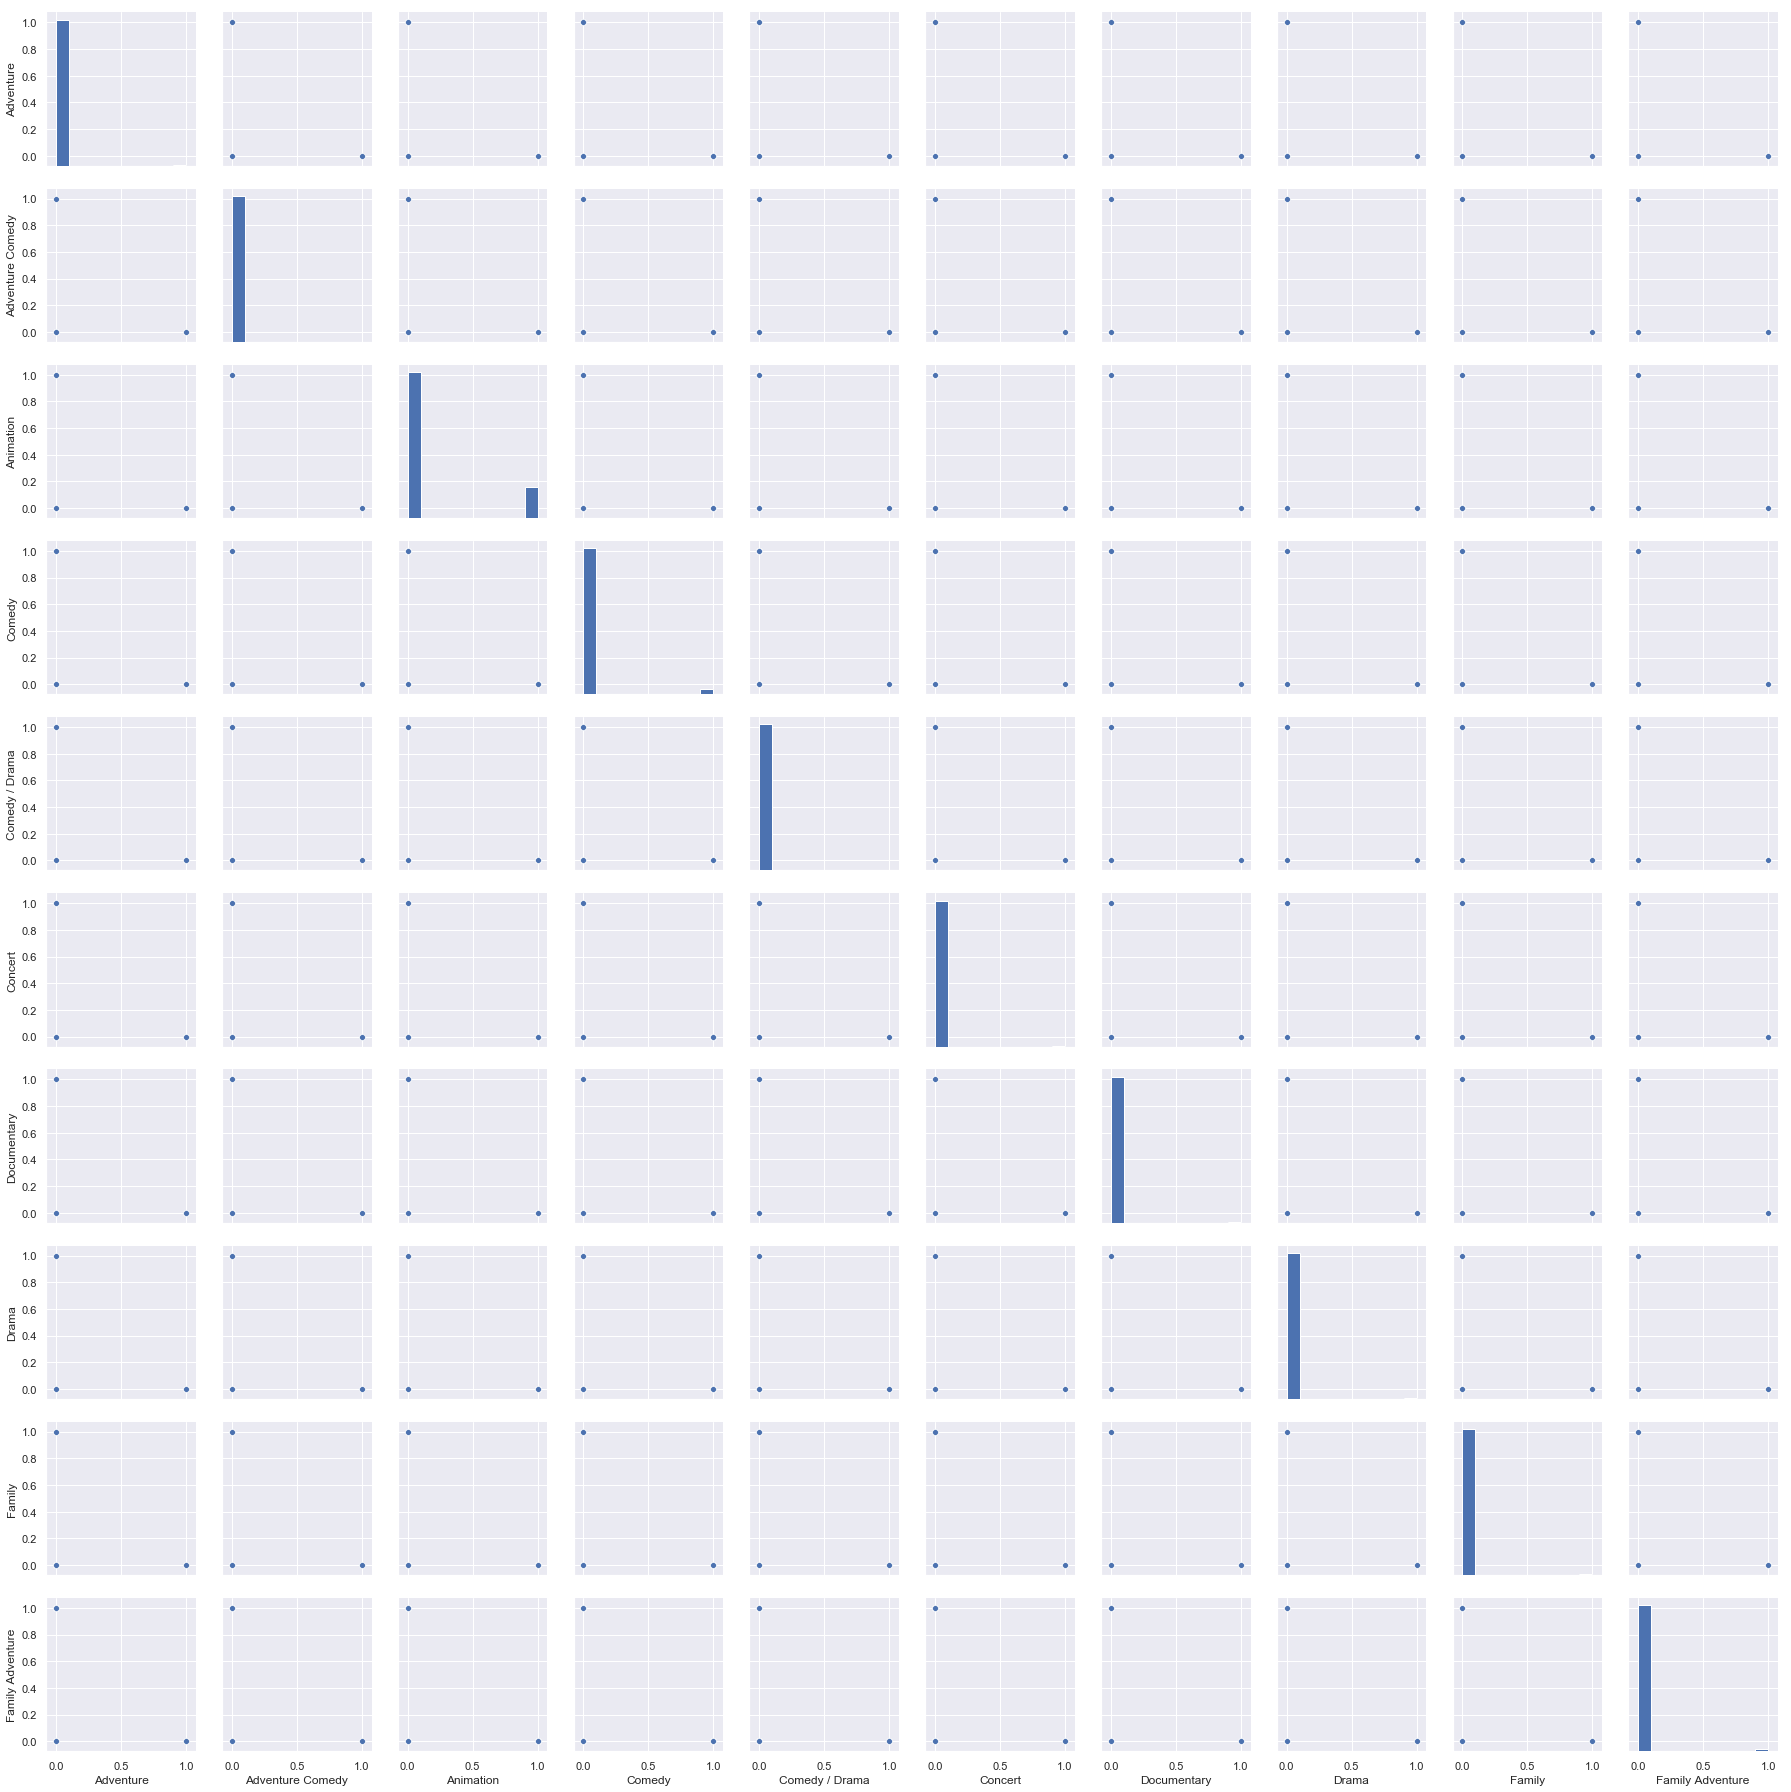

In [25]:
sns.pairplot(df_final.iloc[: , 10:20]) 


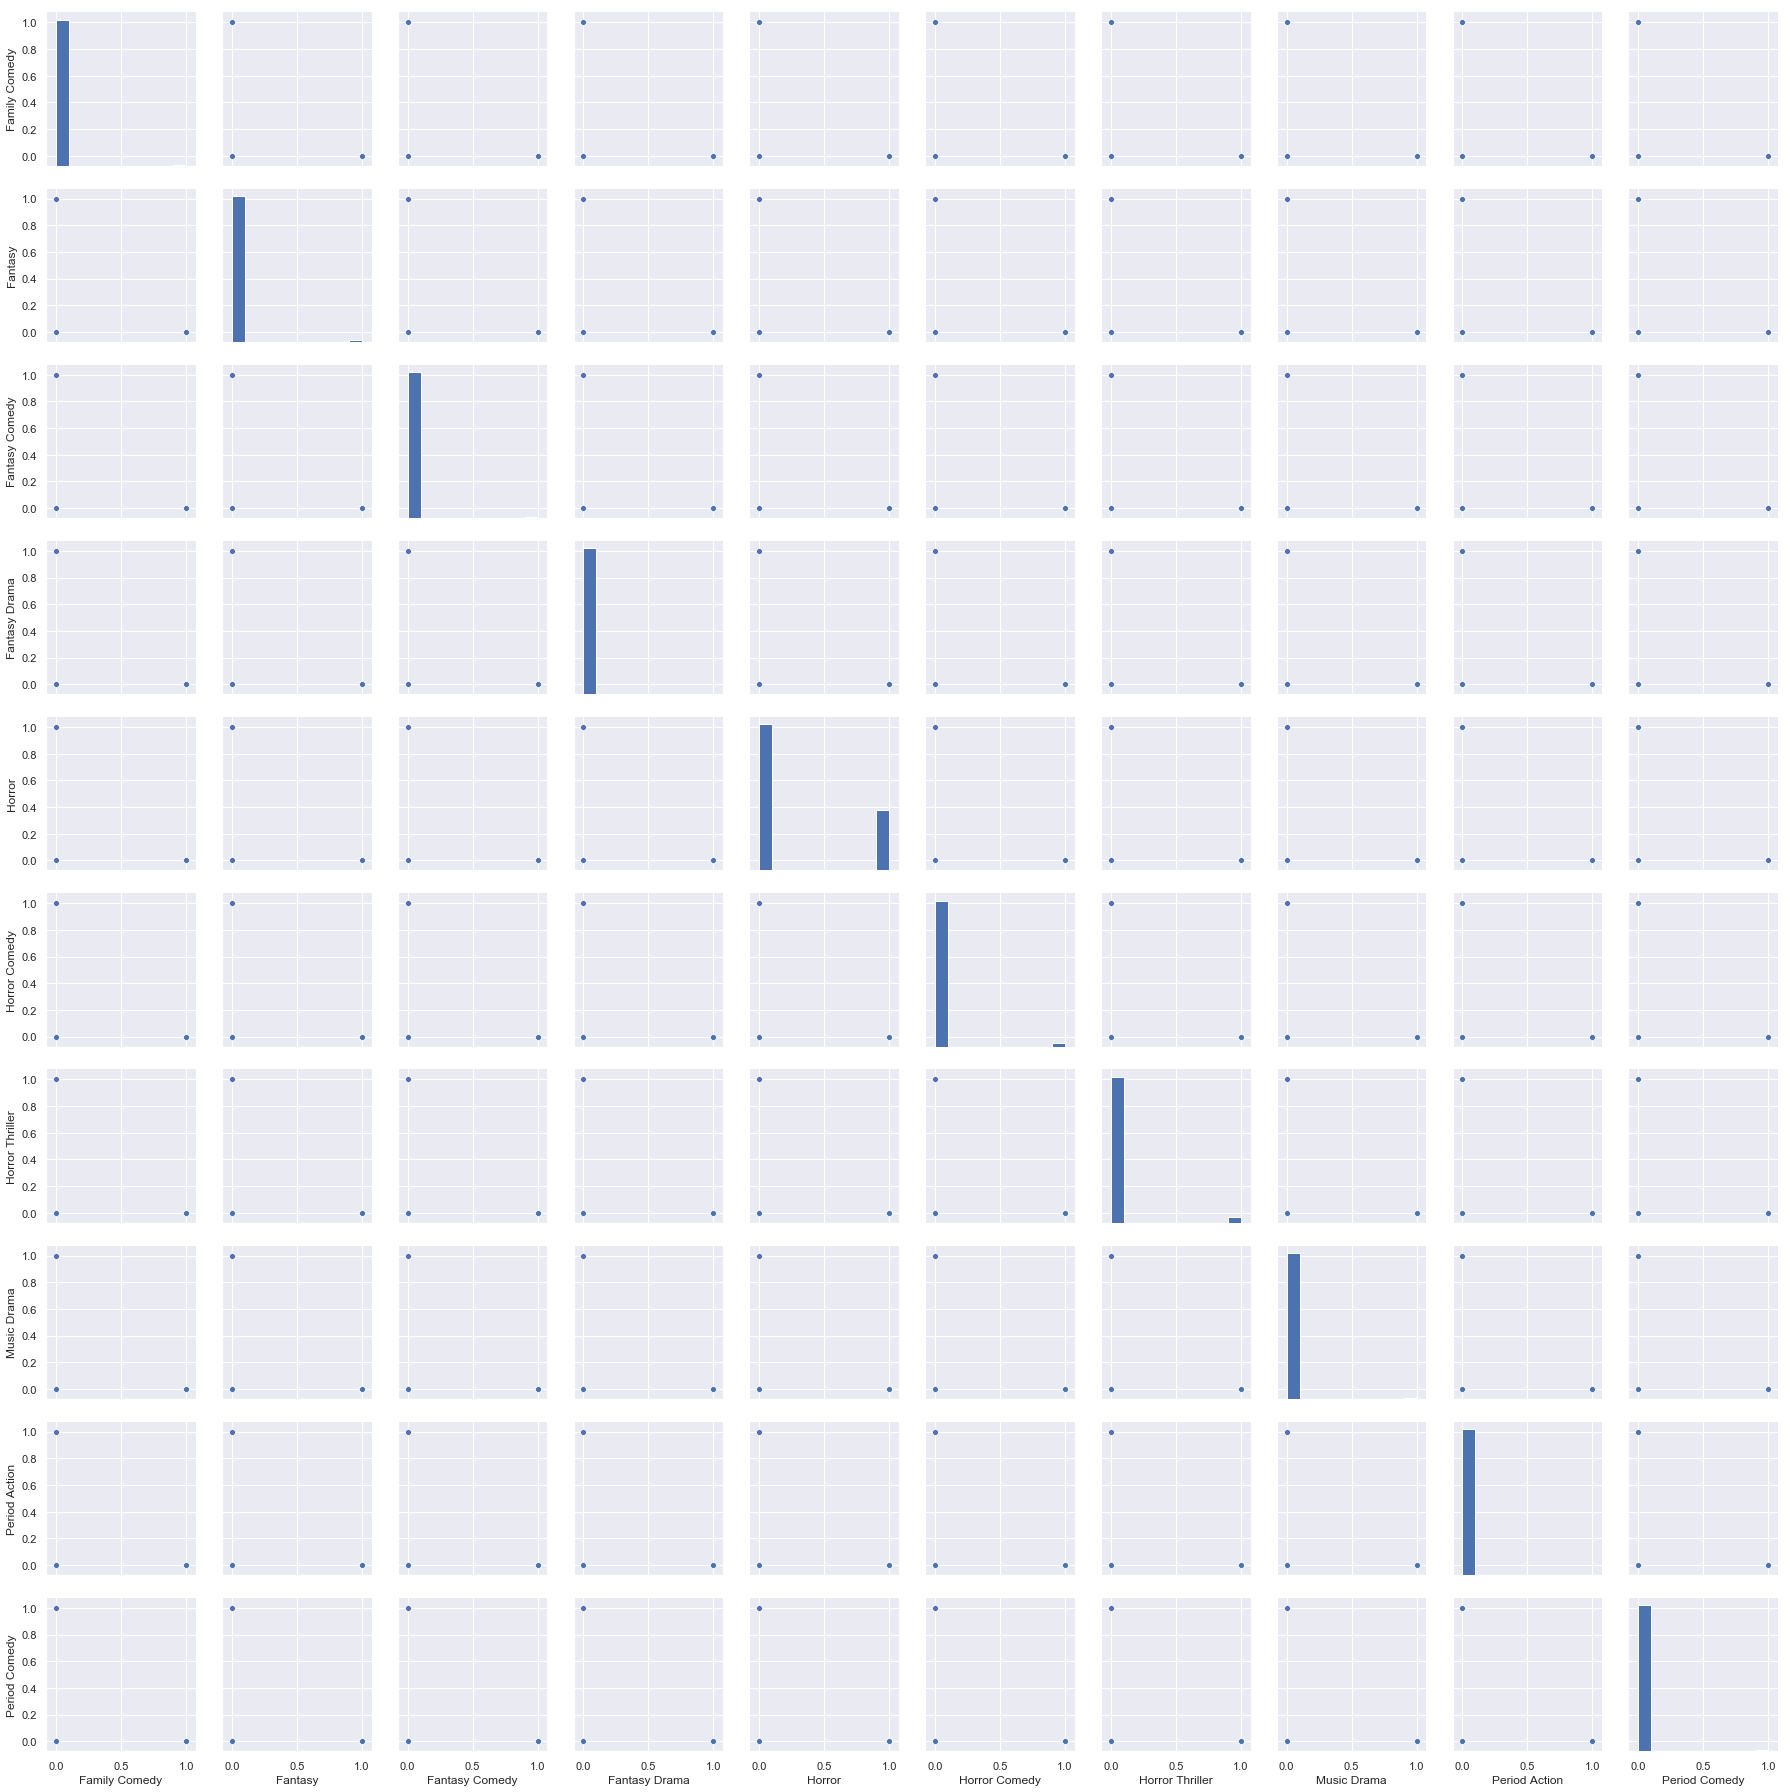

In [26]:
sns.pairplot(df_final.iloc[: , 20:30]) 


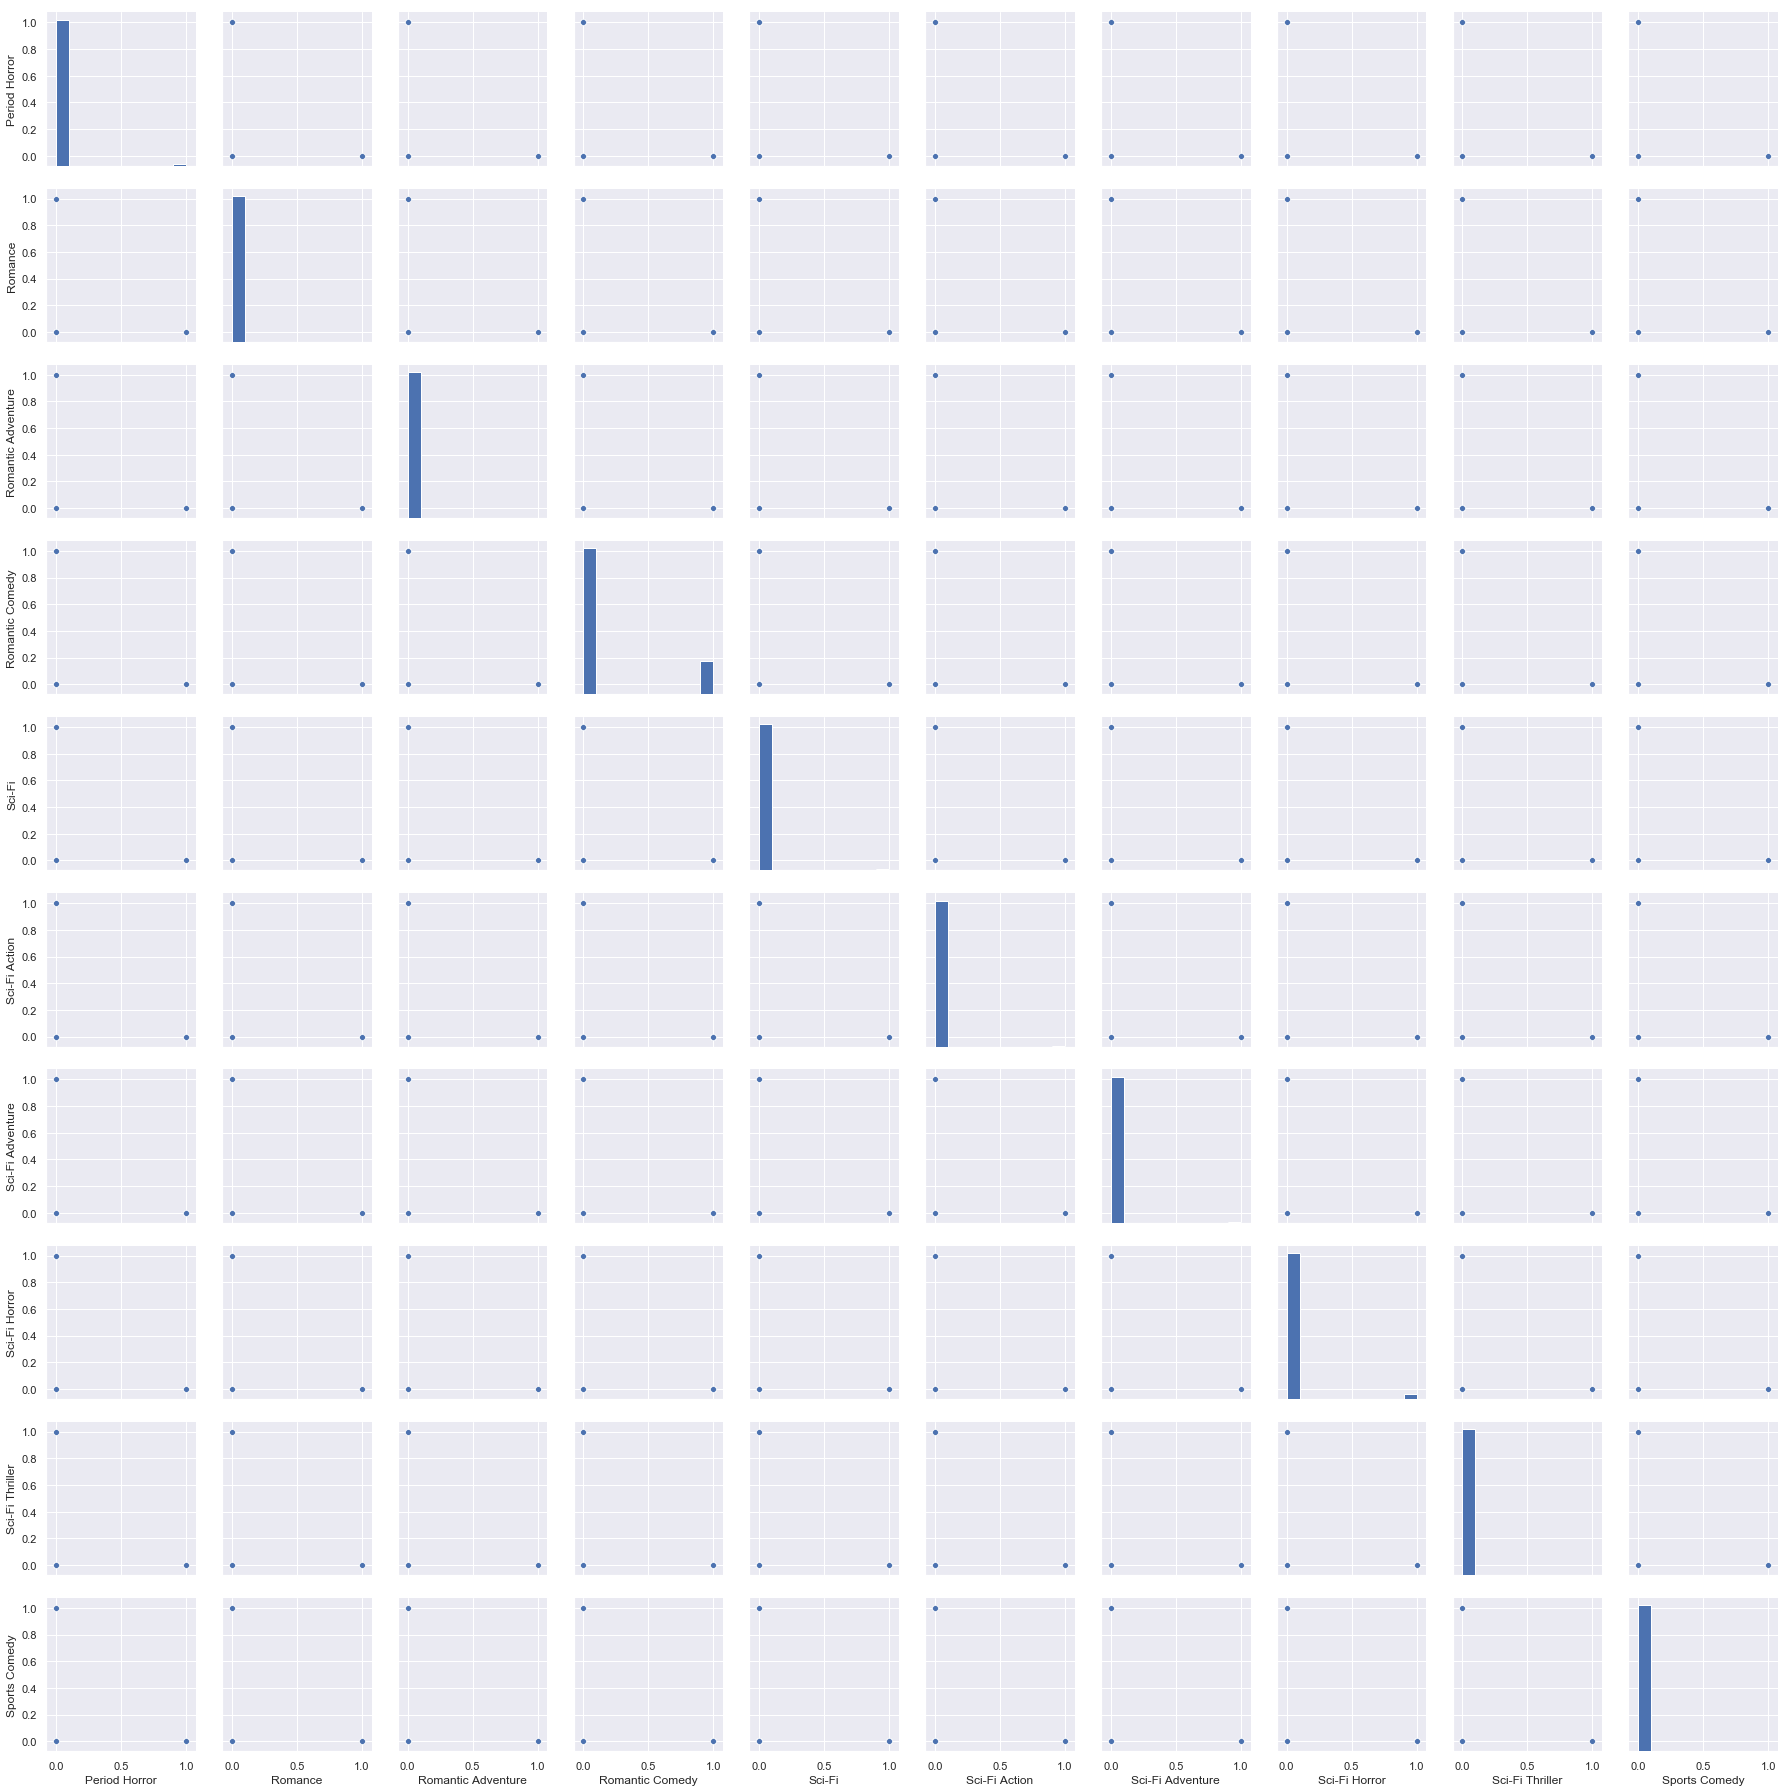

In [27]:
sns.pairplot(df_final.iloc[: , 30:40]) 


In [28]:
m = LinearRegression()
m.fit(X_tr, y_train_1)
m.score(X_tr, y_train_1)

0.2228923397310515

In [29]:
# X_train_scaled = std.fit_transform(X_train_1.values)

# X_test_scaled = std.transform(X_test_1.values)

# X_scaled = std.transform(X_test_1.values)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()





In [ ]:
# m.score(X_train_scaled, y_train_1)

sns.pairplot(df_final[3:18])

In [ ]:
df_final.head()

In [ ]:
import seaborn as sns
sns.pairplot(X_train_scaled)

In [408]:
!pip install yellowbrick

    100% |████████████████████████████████| 286kB 3.3MB/s ta 0:00:01
    100% |████████████████████████████████| 7.8MB 1.7MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


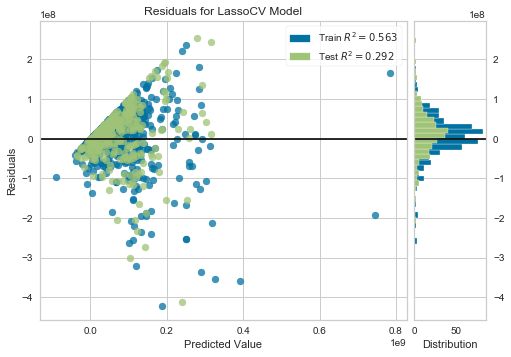

In [147]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(m)

visualizer.fit(X_tr, y_train_1)  # Fit the training data to the model
visualizer.score(X_te, y_test_1)  # Evaluate the model on the test data
visualizer.poof()  

In [92]:
print(m.alpha_)

2790823.6275285655


In [26]:
len(df_final)

922